# Why keras ?

如果說Tensorflow 或者Theano 神經網絡方面的巨人. 那Keras 就是站在巨人肩膀上的人. Keras 是一個兼容Theano 和Tensorflow 的神經網絡高級套件, 用他來寫NN就像在疊積木依樣簡單.


Interface of TensorFlow or Theano

你可以把 Keras想像為以 Tensorflow及 Theano做為運算後臺的前臺使用者介面，讓你能夠在略懂皮毛的知識濃度下就輕鬆地建立起自己需要的 NN。


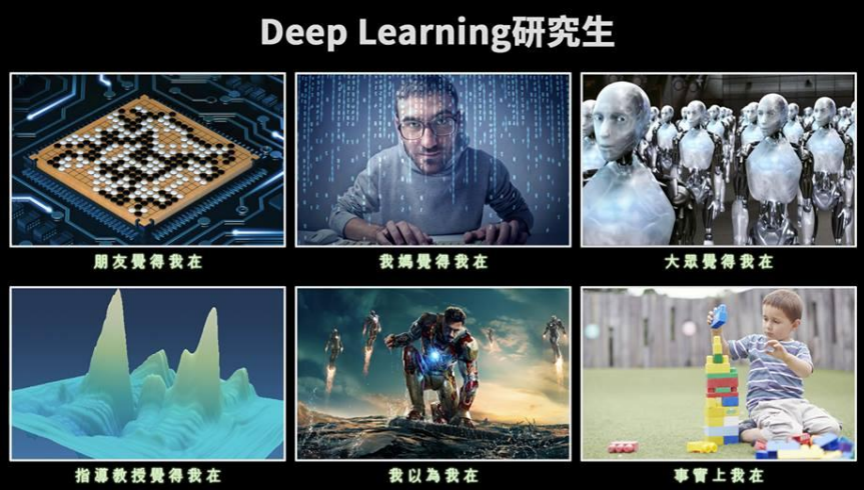

In [1]:
from IPython.display import Image

Image(filename='./image/basic_1.png', width=600)


Keras的計算過程，就是建立一個從張量(tensor)到張量的映射函數，然後再放入真實數據進行計算。

對深度學習而言，這個「映射函數」就是一個NN，而NN中的每個層(layer)自然也都是從張量到張量的映射。


# 資料準備

In [53]:
import numpy as np
import pandas as pd
from keras.utils import np_utils # OneHot encoding 用 
np.random.seed(10)

backend：後端，對Tensorflow和Theano進行封裝，完成低層的張量運算、計算圖編譯等


In [54]:
from keras.datasets import mnist

datasets：提供了一些常用資料庫的接口，用戶將通過這些接口下載和載入數據集


In [55]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [56]:
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

train data= 60000
 test data= 10000


In [57]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [58]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

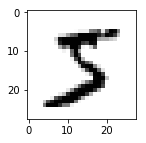

In [59]:
plot_image(x_train_image[0])

In [60]:
y_train_label[0]

5

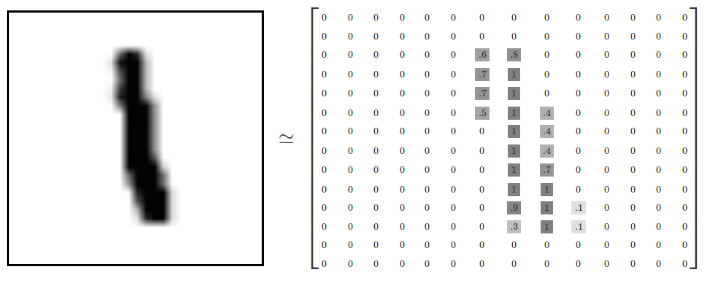

In [61]:
Image(filename='./image/tf_mnist2.png', width=600)


# 將images進行預處理

In [62]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [63]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [64]:
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


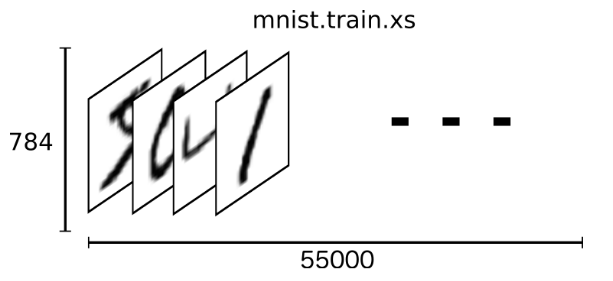

In [65]:
Image(filename='./image/tf_mnist3.png', width=600)


In [66]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

# one hot encode outputs

In [67]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [68]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [69]:
y_TrainOneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

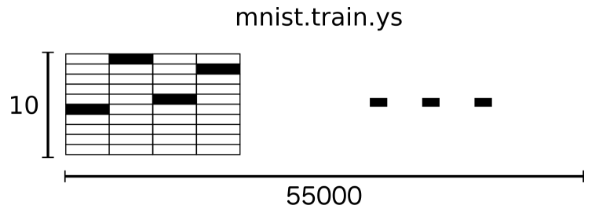

In [70]:
Image(filename='./image/tf_mnist4.png', width=600)


# 建立模型多元感知器(MLP)模型

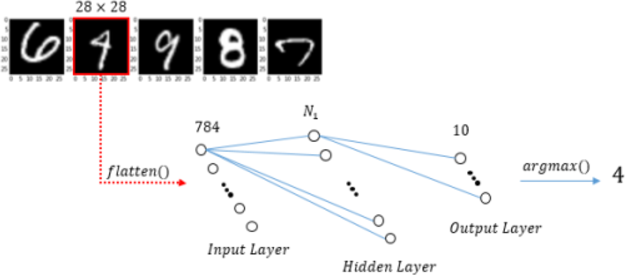

In [71]:
Image(filename='./image/mlp_1.png', width=600)


In [72]:
from keras.models import Sequential
from keras.layers import Dense

models：模型，模型是層的有序組合，也是層的「容器」，是「神經網絡」的整體表示
==>Sequential模型是多個網絡層的線性堆疊，也就是“疊積木”,將nn一層層用.add()方法疊起來。


layers：層，神經網絡的層本質上規定了一種從輸入張量到輸出張量的計算規則，顯然，整個神經網絡的模型也是這樣一種張量到張量的計算規則，因此keras的model是layer的子類
==>Dense 為全連接的nn層,所有上層與下一層的神經元都是完全連接起來的


In [73]:
model = Sequential()

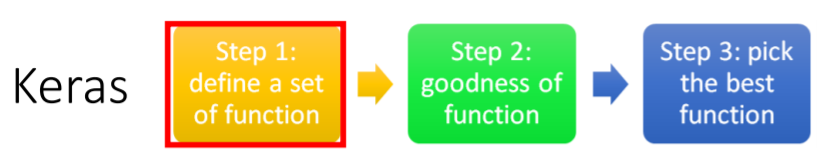

In [3]:
Image(filename='./image/a.png', width=600)


In [74]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

kernel_initializer='normal',用常態分佈的亂數初始化 W & b 


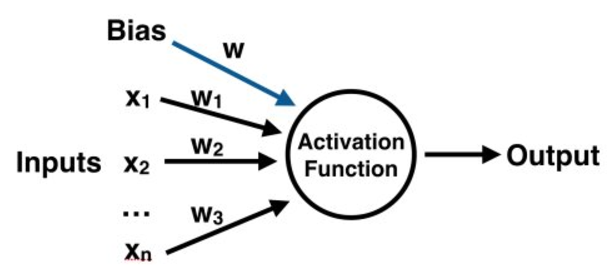

In [75]:
Image(filename='./image/act.png', width=400)


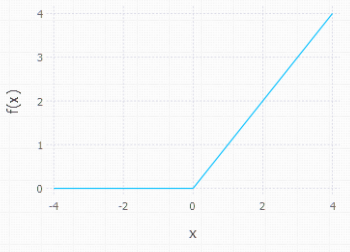

In [76]:
Image(filename='./image/relu.png', width=400)


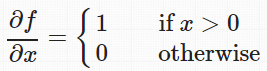

In [77]:
Image(filename='./image/drelu.png', width=300)


In [78]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

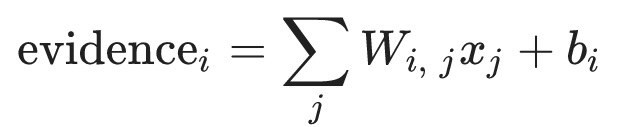

In [79]:
Image(filename='./image/tf_mnist5.png', width=300)


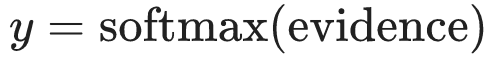

In [80]:
Image(filename='./image/tf_mnist6.png', width=300)


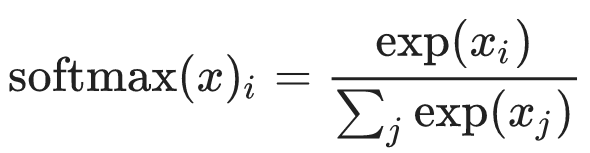

In [81]:
Image(filename='./image/tf_mnist7.png', width=300)


In [82]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


需要訓練的參數個數計算如下:

784*256+256 = 200960

10*256+10 = 2570

200960+2570 = 203530

# 訓練模型

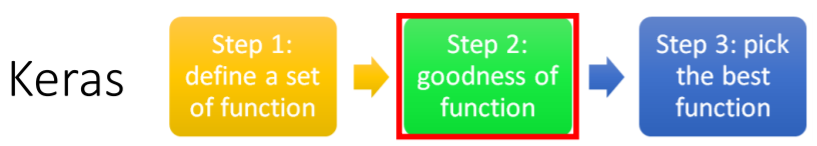

In [5]:
Image(filename='./image/2.png', width=600)


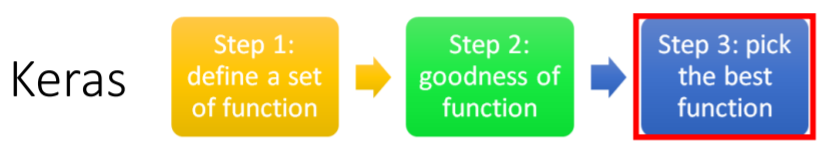

In [6]:
Image(filename='./image/3.png', width=600)


In [83]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

損失函數（loss function）是用來估量你模型的預測值f(x)與真實值Y的不一致程度，
它是一個非負實值函數,通常使用L(Y, f(x))來表示

optimizers：優化器，規定了神經網絡的參數如何更新
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)



categorical_crossentropy


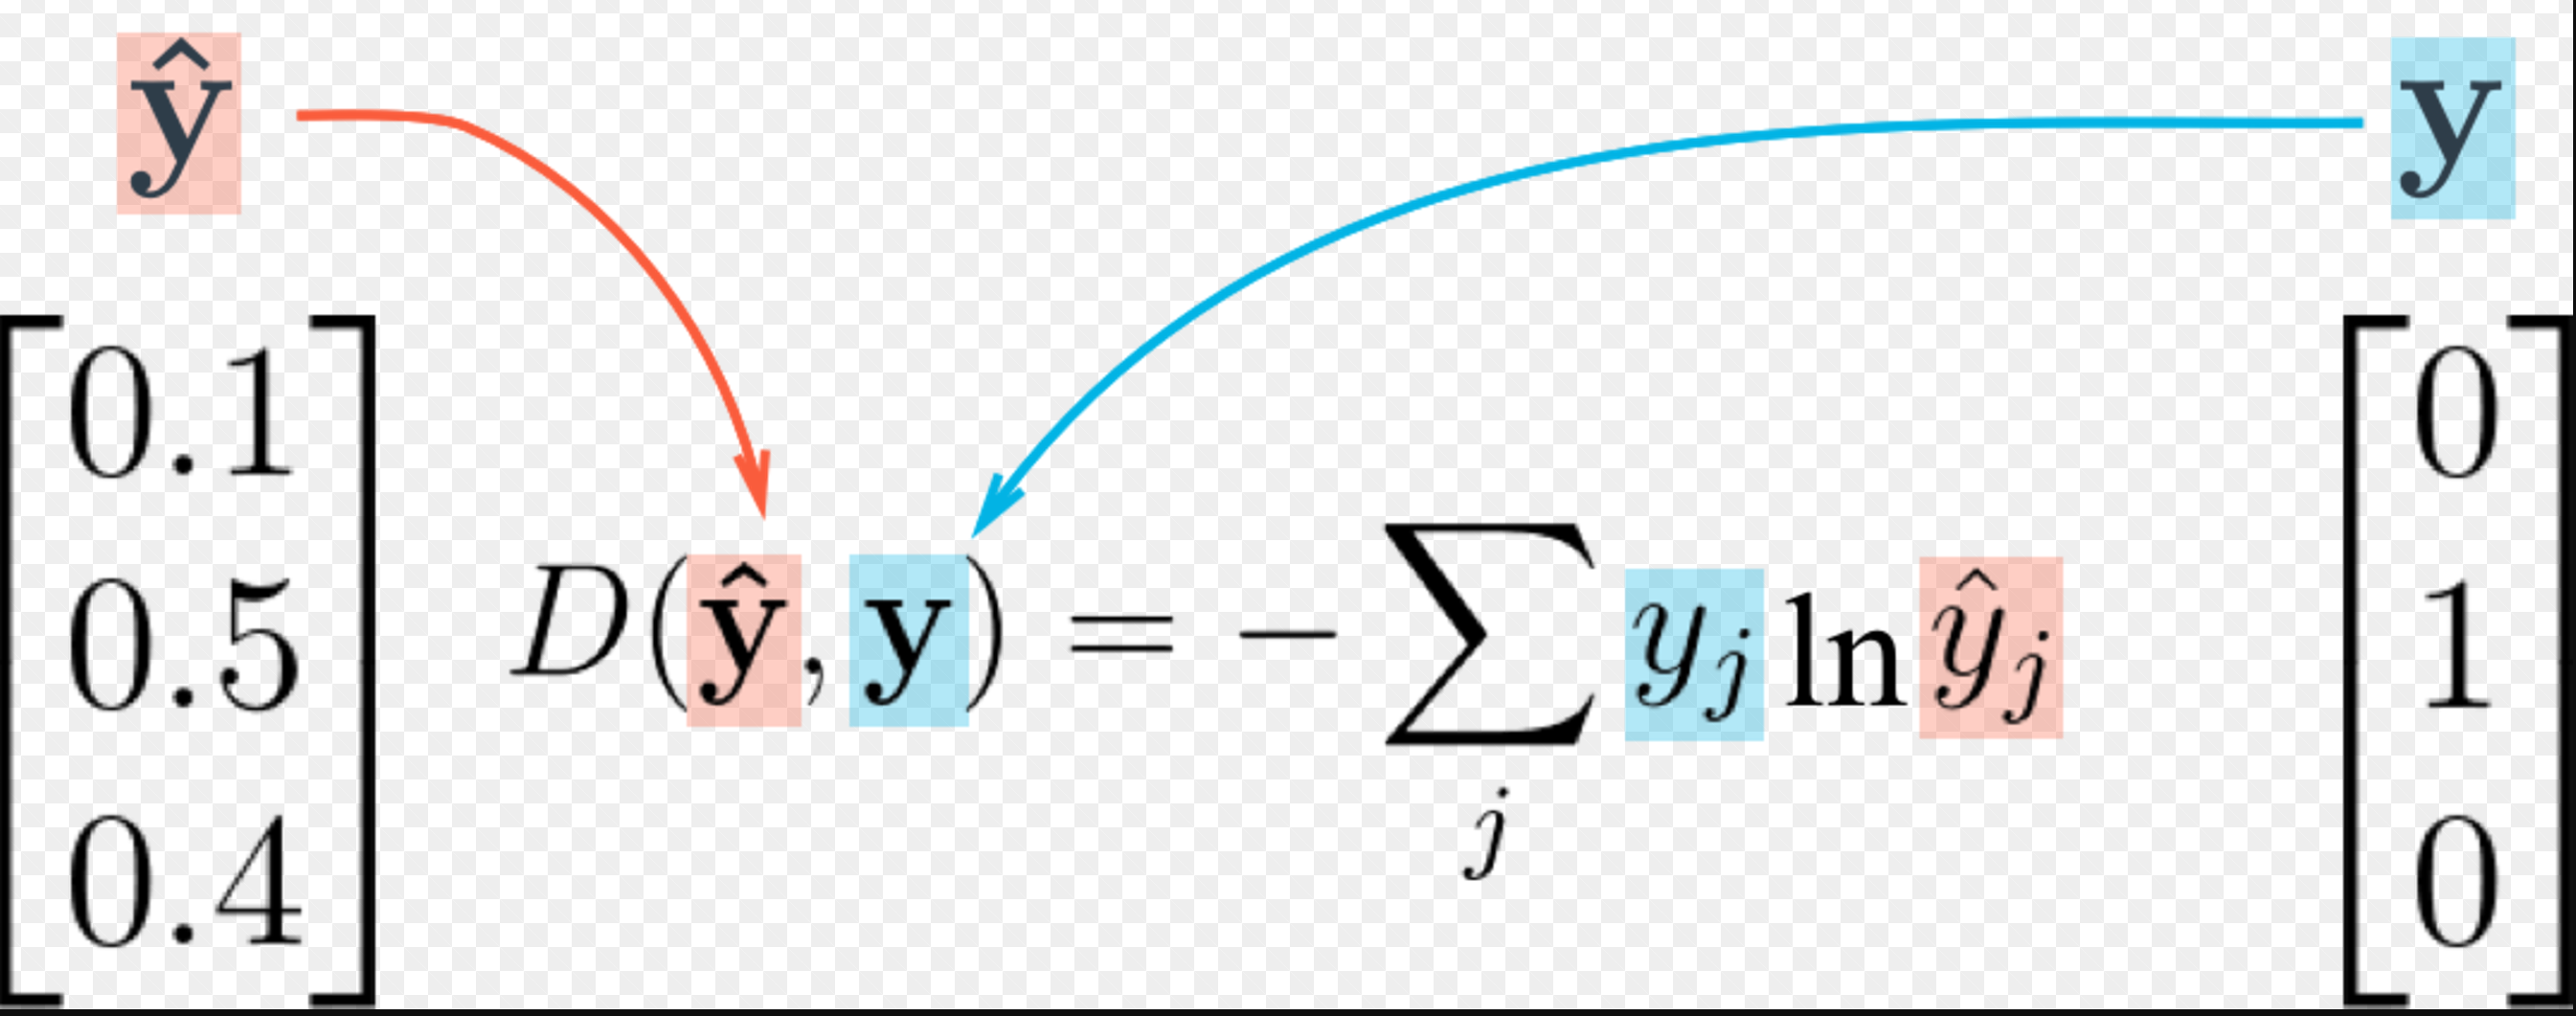

In [4]:
print('categorical_crossentropy')
Image(filename='./image/cross_e.png', width=500)


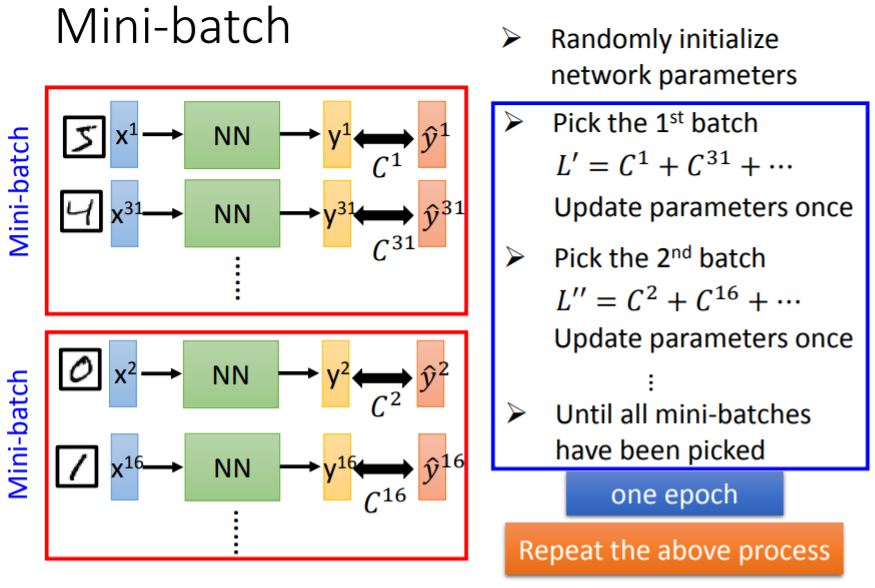

In [7]:
Image(filename='./image/batch.png', width=600)


In [87]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_TrainOneHot,
                         validation_split=0.2, 
                         # training set 80%, test set 20% 
                         epochs=2, 
                         batch_size=200,
                         verbose=2
                        )

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
2s - loss: 0.1898 - acc: 0.9452 - val_loss: 0.1626 - val_acc: 0.9544
Epoch 2/2
2s - loss: 0.1346 - acc: 0.9623 - val_loss: 0.1278 - val_acc: 0.9625


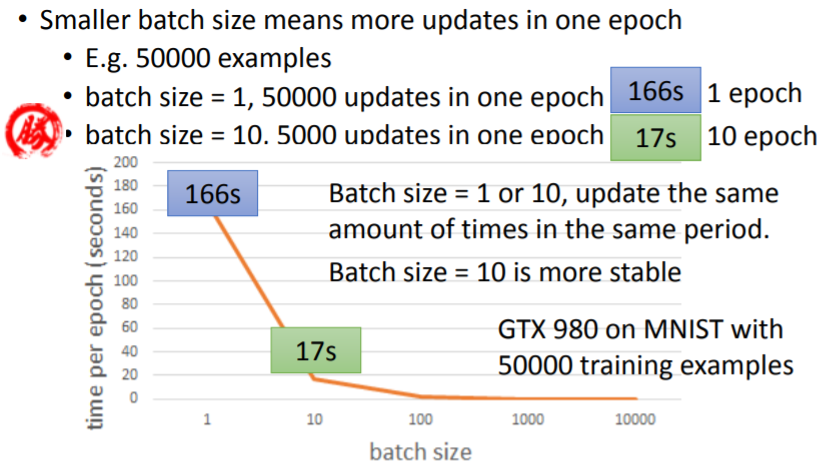

In [8]:
Image(filename='./image/speed.png', width=600)


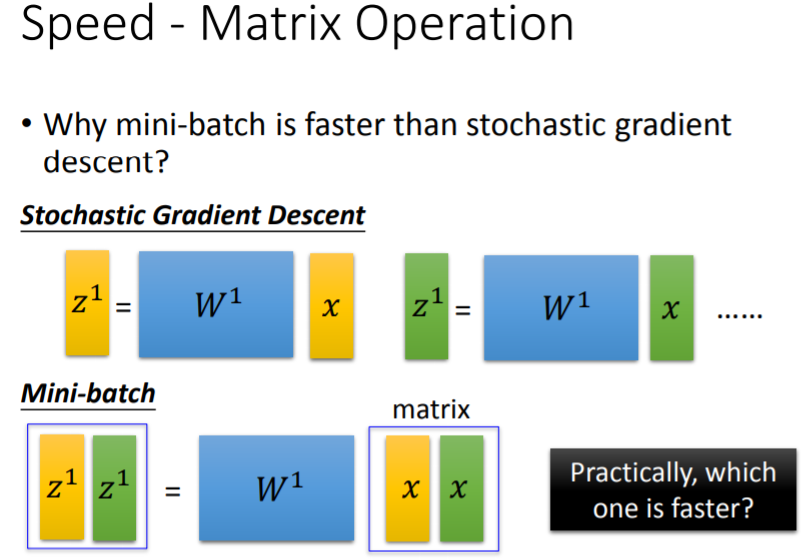

In [9]:
Image(filename='./image/speed2.png', width=600)


In [89]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

 9120/10000 [==========================>...] - ETA: 0s
accuracy= 0.9642


# confusion matrix

In [91]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict    0     1    2    3    4    5    6    7    8    9
label                                                     
0        971     0    1    1    0    1    3    1    2    0
1          0  1117    3    1    0    1    5    2    6    0
2          8     1  991    3    2    0    6    7   14    0
3          1     0    8  978    0    2    0    9    9    3
4          3     0    5    1  937    0    8    5    4   19
5          8     2    0   19    1  840    9    1   10    2
6          9     3    0    1    2    5  935    1    2    0
7          1     5   15    4    0    1    0  994    1    7
8          6     1    2    8    3    2   10    9  930    3
9         10     6    1   12   12    1    1   10    4  952

In [92]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

label  predict
0      7        7
1      2        2

In [93]:
df[(df.label==5)&(df.predict==3)]

label  predict
340       5        3
412       5        3
1003      5        3
1393      5        3
1970      5        3
2035      5        3
2810      5        3
3702      5        3
3902      5        3
3968      5        3
4271      5        3
4300      5        3
4355      5        3
4360      5        3
5891      5        3
5913      5        3
5937      5        3
5972      5        3
6598      5        3

In [95]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

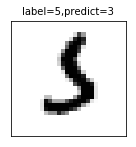

In [96]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

# Analysis 

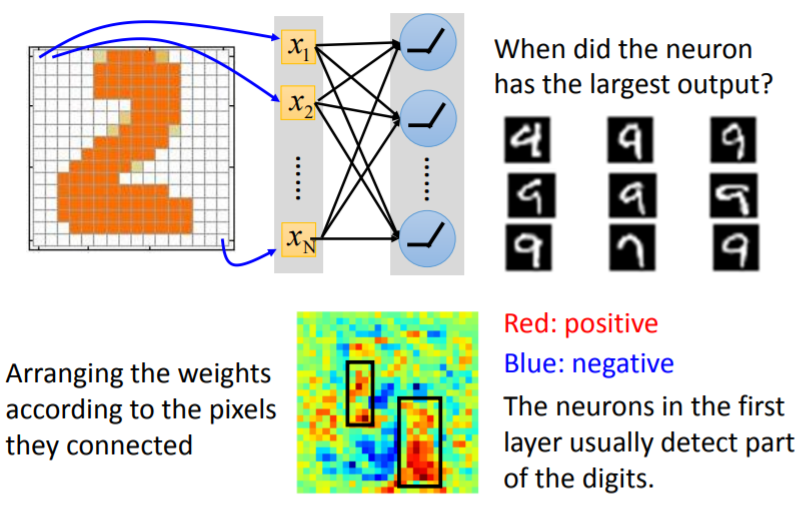

In [13]:
Image(filename='./image/Analysis.png', width=600)


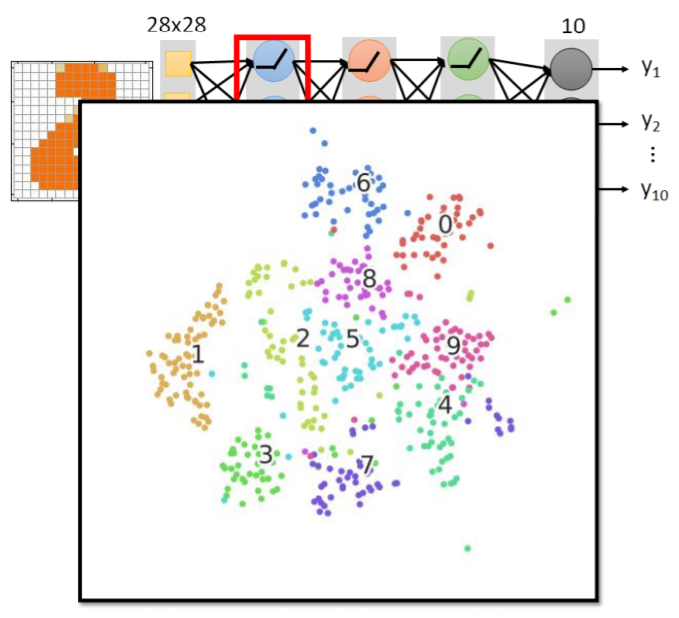

In [14]:
Image(filename='./image/ana2.png', width=600)


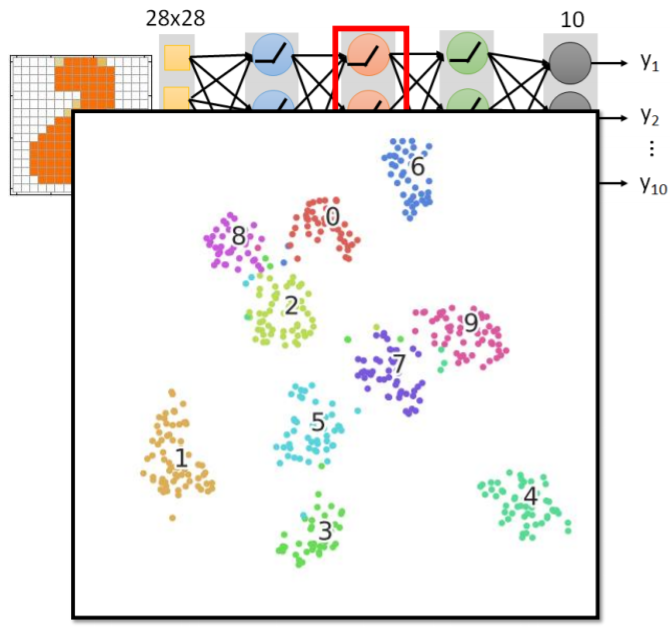

In [15]:
Image(filename='./image/ana3.png', width=600)


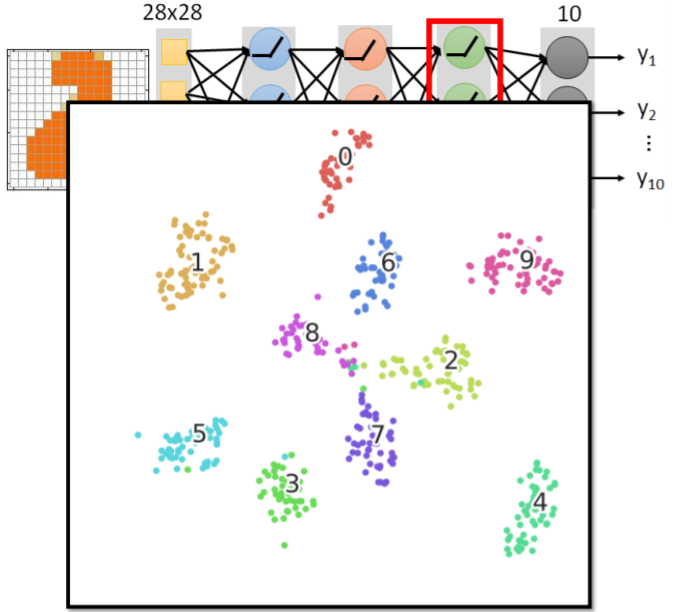

In [16]:
Image(filename='./image/ana4.png', width=600)


# another task